<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/punto1_2_3_4_(Parcial_2_s_y_s).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

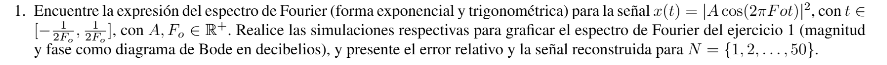

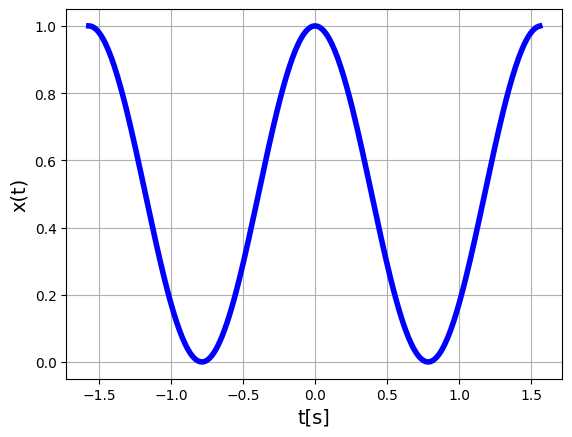

In [ ]:
import matplotlib.pyplot as plt # importamos las librerias
import numpy as np
#mostramos la señal
To = np.pi # periodo definido
Fo = 1/To
Fs = 300*Fo # frecuencia de muestreo definida
tv = np.arange(-To/2,To/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
A=1 #Constante definida
x = (A*np.cos(2*np.pi*Fo*tv))**2 # construimos la señal

#graficar señal original
plt.plot(tv,x,'b',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 50 #numero armonicos
wo = 2*np.pi/To # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = 0*nv
Cn[N] = (A**2)/2 #Nivel DC
Cn[N+2] = (A**2)/4
Cn[N-2] = (A**2)/4

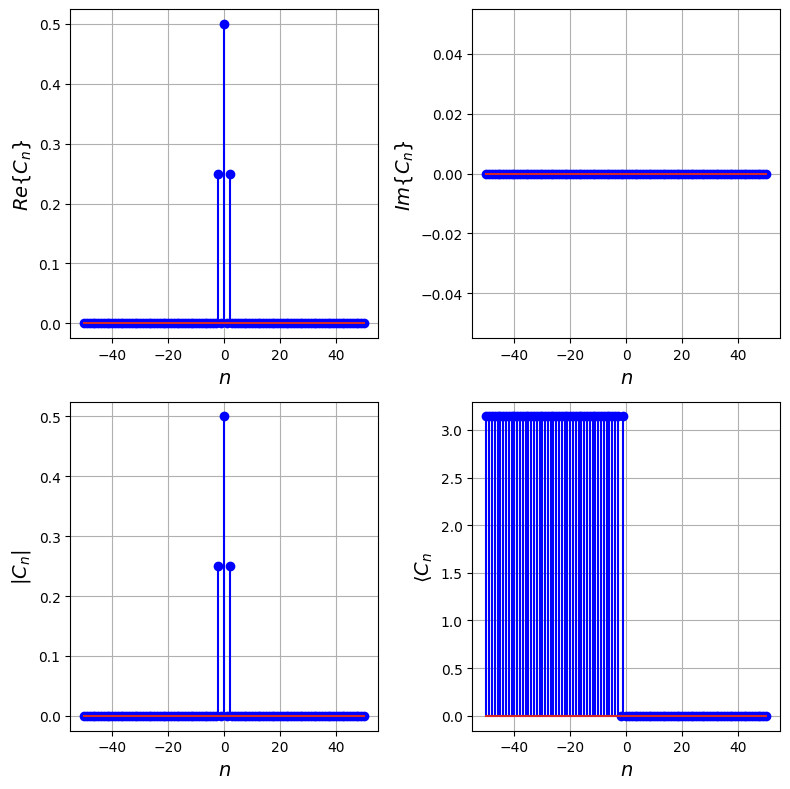

In [ ]:
#graficar espectro (Diagramas de bode)
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'b')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'b')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'b')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'b')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<ipython-input-5-72625f0558b0>:4: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20 * np.log10(abs(Cn)), 'b')


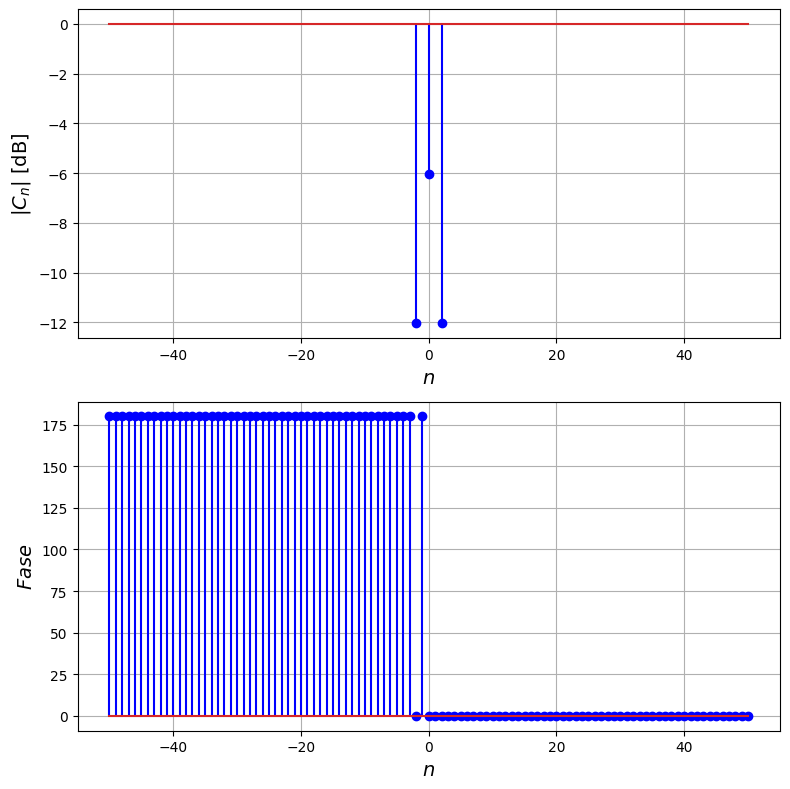

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'b')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.axis('tight')
plt.grid()


plt.subplot(2, 1, 2)
plt.stem(nv, np.angle(Cn, deg=True), 'b')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Fase$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.tight_layout()

In [ ]:
from ipywidgets import interact,IntSlider
Px = 0.375 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=5, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(0,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>

2. Sea la senal portadora $c(t) = A_c sin(2πF_ct)$, con $A_c, F_c ∈ R$, y la senal mensaje $m(t) ∈ R$. Encuentre el espectro en
frecuencia de la senal modulada en amplitud (AM), $y(t)= (1 + \frac{m(t)}{A_c})
c(t)$. Luego, descargue desde youtube 5 segundos de
su cancion favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la cancion escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.

  Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de
modulacion deseado.

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

Utilizando tablas de Fourier:

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)



1.25


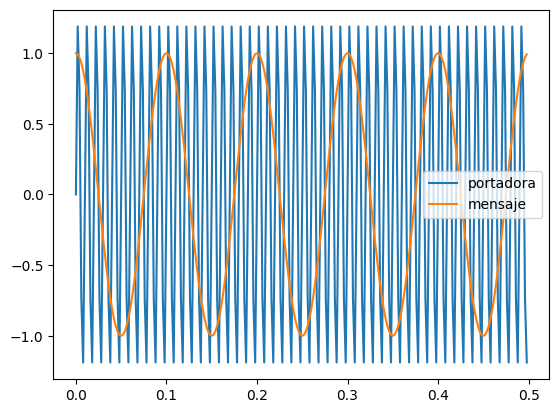

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

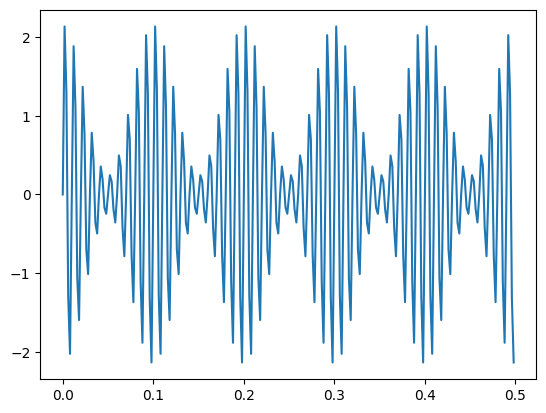

In [ ]:
#se modula la señal a partir de la señal mensaje y señal portadora
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('')
plt.ylabel('')
plt.show()

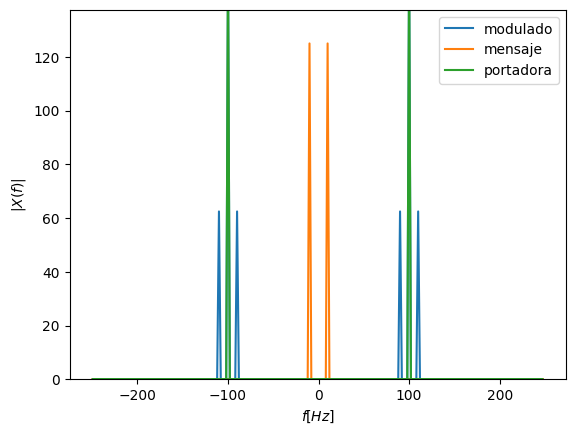

In [ ]:
# a partir de la fft se calcula el espectro de la señal portadora, mensaje y modulada
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.7 MB 6.6 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-73lhpd5z/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [ ]:
link="https://www.youtube.com/watch?v=hd0cl2d2ziU"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=hd0cl2d2ziU
[youtube] hd0cl2d2ziU: Downloading webpage
[youtube] hd0cl2d2ziU: Downloading tv client config
[youtube] hd0cl2d2ziU: Downloading player 0f7c1eff
[youtube] hd0cl2d2ziU: Downloading tv player API JSON
[youtube] hd0cl2d2ziU: Downloading ios player API JSON
[youtube] hd0cl2d2ziU: Downloading m3u8 information
[info] hd0cl2d2ziU: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    4.81MiB in 00:00:00 at 7.14MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [ ]:
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
x.shape

(14075194, 2)

In [ ]:
#Se observa que la canción x tiene dos columnas (canal de audio derecho e izquierdo). Por simplicidad se va a trabajar solamente con el primer canal

In [ ]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

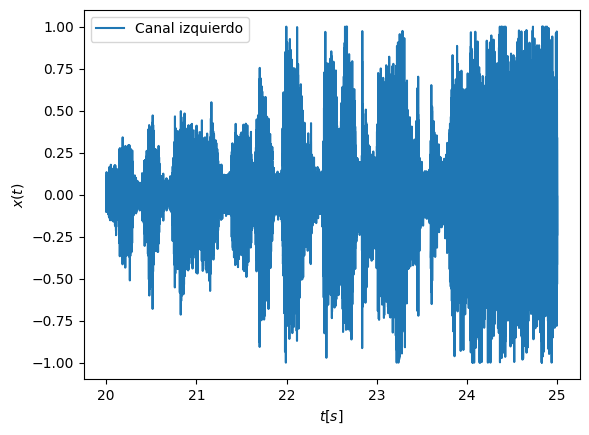

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

In [ ]:
len(xs)

240000

In [ ]:
# el usuario debe ingresar el indice de modulacion
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Ingrese el indice de modulacion que desea:  0.8


In [ ]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


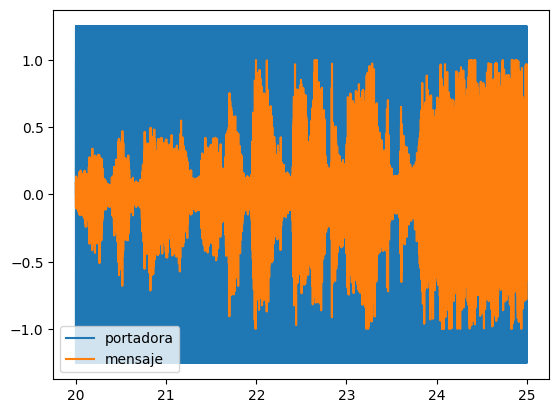

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

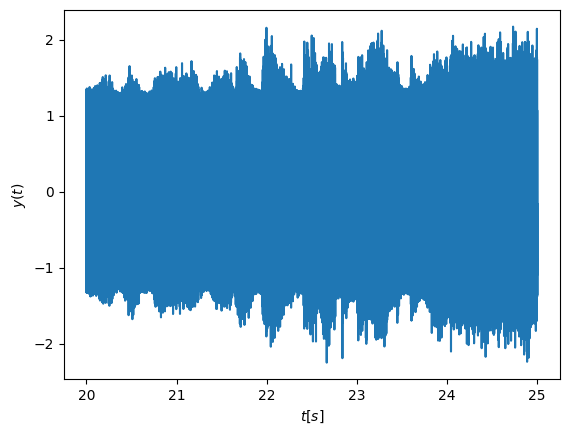

In [ ]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

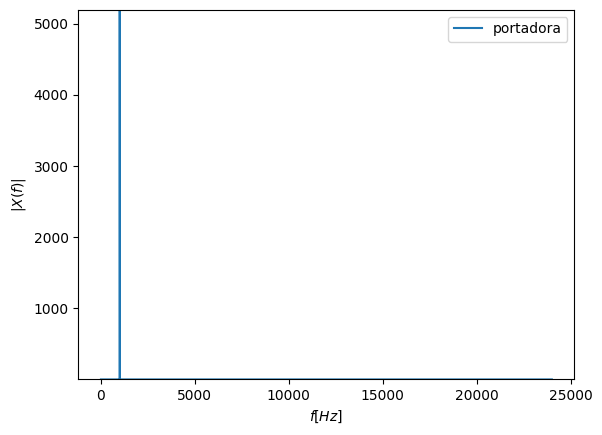

In [ ]:
#se presenta el espectro de la señal mensaje (cancion), portadora y modulada Debido a que no hay componente imaginaria, se puede usar la transformada real rápida de fourier. Para valores de frecuencia negativo el gráfico se refleja (simetría par)
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()


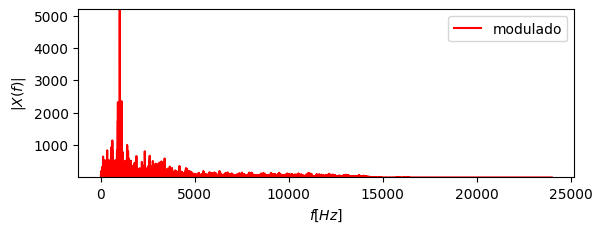

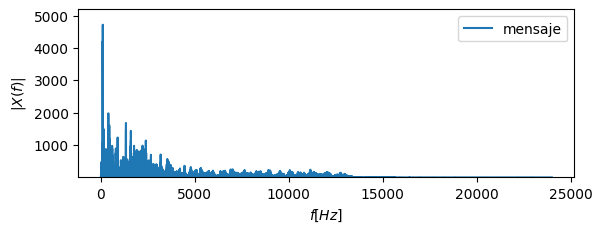

In [ ]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
#audio de la portadora
Audio(c,rate=fs)

In [ ]:
#audio del mensaje
Audio(xs,rate=fs)

In [ ]:
#audio de la señal modulada
Audio(y,rate=fs)

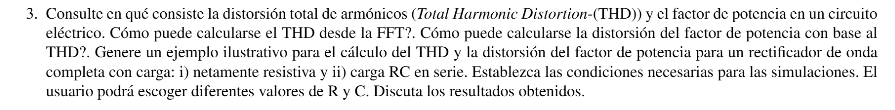

# Abstracto

Esta medida de distorsión tiene dos definiciones diferentes, la primera nos dice que se debe tomar como punto de referencia el armónico fundamental (THDF) y la segunda se debe tomar como comparación a la raíz cuadrada de la media de la señal (THDR). Para evitar ambigüedades, errores o malas interpretaciones se optará por utilizar la primera definición, puesto que es la que la IEEE recomienda seguir, además que es la definición adoptada por la IEC.





# Distorsion

Cuando el voltaje o la corriente de un sistema eléctrico tienen deformaciones con respecto a la forma de onda sinusoidal, se dice que la señal está distorsionada. Dicha distorsión puede deberse a fenómenos transitorios como   arranque de motores, conmutación de capacitores, efectos de tormentas o fallas por cortocircuito entre otras.

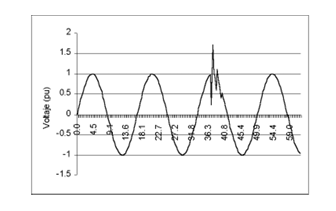

Para que se considere como distorsión armónica las deformaciones en una señal, se deben de cumplir las siguientes condiciones:

*   Que la señal tenga valores definidos dentro del intervalo, lo que implica que la energía contenida es finita
*   Que la señal sea periódica, teniendo la misma forma de onda en cada ciclo de la señal de corriente o voltaje.

* 	Que la señal sea periódica, teniendo la misma forma de onda en cada ciclo de la señal de corriente o voltaje.



# Distorsion total de armonicos (THD)

La distorsión total de armónicos (THD) Es el parámetro de medición de distorsión más conocido, por lo que es recomendable para medir la distorsión en parámetros individuales (I y V), dicha medición consiste básicamente en comparar el armónico fundamental, con todos los demás armónicos de la señal

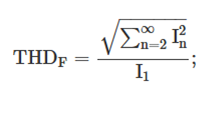

Otra forma para calcular el THD es haciendo uso de la transformada rápida de Fourier (FFT), ya que esta herramienta nos permite analizar las frecuencias de una señal descomponiéndola en sus componentes sinusoidales y cosenoidales, lo que nos permite extraer los valores de la amplitud en cada componente y de esta manera compararlo con la fundamental

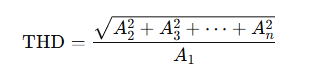



# THD y el factor de potencia (fp)

El factor de potencia a grosso modo es un índice que mide la eficiencia energética de un sistema eléctrico y la forma más común de calcularlo que se suele enseñar es mediante el coseno del angulo formado entre la potencia activa y la potencia aparente

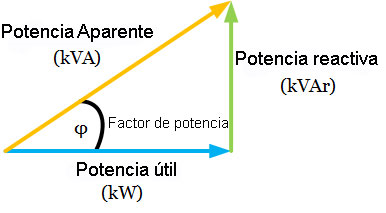

Esta definición, aunque es correcta, su validez se limita a señales que no posean armónicos distorsionados y es que esta fórmula solo tiene en cuenta la información de la fundamental, lo que puede generar problemas en los equipos a la larga ya que los armónicos tienen la capacidad de producir una serie de problemas, como la resonancia en los bancos de capacitores, quemar fusibles, accionar los interruptores diferenciales y termo magnéticos, aumentar gradualmente la corriente que pasa por el neutro, etc.. Para solucionar este problema se desarrolló el Factor de potencia distorsionante, el cual hace uso del THD, para de esta manera tomar en cuenta todo el espectro de la señal

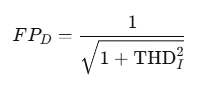

Al unir estas dos fórmulas, tendremos como resultado el factor de potencia total del dispositivo

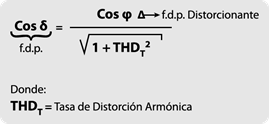



In [ ]:
# Ejemplo
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
# Parámetros del sistema
sampling_rate = 10000  # Frecuencia de muestreo
T = 1.0 / sampling_rate  # Intervalo de tiempo
t = np.linspace(0, 1.0, sampling_rate)
# Generar señal del rectificador de onda completa
def rectificador_onda_completa(t, f, R, C=None):
    # Onda senoidal fundamental
    signal = np.abs(np.sin(2 * np.pi * f * t))

    if C is not None:
        # Respuesta para carga RC
        tau = R * C
        signal = signal * np.exp(-t / tau)

    return signal

# Calcular la FFT y los armónicos
def calcular_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)[:N // 2]
    return xf, np.abs(yf[:N // 2])

# Calcular THD
def calcular_thd(yf):
    V1 = yf[1]  # El primer armónico
    harmonics = np.sqrt(np.sum(yf[2:]**2))
    thd = harmonics / V1
    return thd

  # Parámetros de la simulación
f = 60  # Frecuencia de la señal de entrada (50 Hz)
R = float(input("Ingrese el valor de R deseado:"))  # Valor de la resistencia (ohmios)
C = float(input("Ingrese el valor de C deseado:"))  # Valor del condensador (faradios)

# Simulación para carga resistiva pura
signal_resistiva = rectificador_onda_completa(t, f, R)

# Simulación para carga RC en serie
signal_rc = rectificador_onda_completa(t, f, R, C)

# FFT de ambas señales
xf_res, yf_res = calcular_fft(signal_resistiva, sampling_rate)
xf_rc, yf_rc = calcular_fft(signal_rc, sampling_rate)

# Calcular THD
thd_resistiva = calcular_thd(yf_res)
thd_rc = calcular_thd(yf_rc)

print(f"THD para carga resistiva pura: {thd_resistiva:.4f}")
print(f"THD para carga RC: {thd_rc:.4f}")

# Graficar señales y su espectro
plt.figure(figsize=(12, 6))

# Señal en el dominio del tiempo
plt.subplot(2, 2, 1)
plt.plot(t[:500], signal_resistiva[:500])
plt.title("Señal con carga resistiva pura")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(2, 2, 2)
plt.plot(t[:500], signal_rc[:500])
plt.title("Señal con carga RC")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# FFT de las señales
plt.subplot(2, 2, 3)
plt.plot(xf_res, yf_res)
plt.title("FFT - Carga resistiva pura")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.subplot(2, 2, 4)
plt.plot(xf_rc, yf_rc)
plt.title("FFT - Carga RC")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

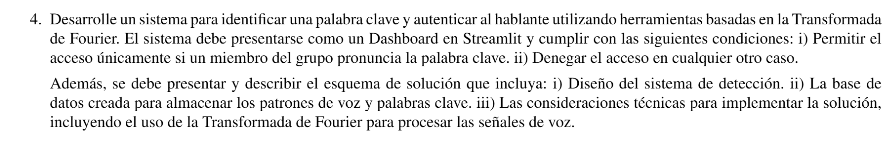

In [ ]:
## punto 4

#cargar datos desde drive acceso libre
FILEID = "1BOt2QgWDfR6g2UyktrMIECFALV1f_lRe"

## punto 4

#cargar datos desde drive acceso libre
FILEID = "1BOt2QgWDfR6g2UyktrMIECFALV1f_lRe"

#https://drive.google.com/file/d/1tK3eDzhyC6GWDvUJScBYFGhxNxdOcz5t/view?usp=drive_link
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O file.zip && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-04 03:17:27--  https://docs.google.com/uc?export=download&confirm=&id=1BOt2QgWDfR6g2UyktrMIECFALV1f_lRe
Resolving docs.google.com (docs.google.com)... 172.217.214.101, 172.217.214.139, 172.217.214.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BOt2QgWDfR6g2UyktrMIECFALV1f_lRe&export=download [following]
--2025-02-04 03:17:27--  https://drive.usercontent.google.com/download?id=1BOt2QgWDfR6g2UyktrMIECFALV1f_lRe&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17711 (17K) [application/octet-stream]
Saving to: ‘file.zip’

file.zip            100%[===================>]  17.30K  --.-KB/s 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the excel file is within the 'file.zip' archive
import zipfile

# Unzip the file
with zipfile.ZipFile('file.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Get the list of files within the zip archive
files_in_zip = zip_ref.namelist()

# Find the Excel file (assuming there's only one)
excel_file = [f for f in files_in_zip if f.endswith('.xlsx')][0]

# Read the Excel file using the full path within the extracted archive
X = pd.read_excel(excel_file)
X  # imprimir filas iniciales

,link,type,type_num
0,https://drive.google.com/file/d/1tuhRS1qx7AK3S...,clave,0
1,https://drive.google.com/file/d/1bkJCSG04_pE_-...,clave,0
2,https://drive.google.com/file/d/1SYbOAstE7vJ9k...,clave,0
3,https://drive.google.com/file/d/1anAeOQfHmrcuf...,clave,0
4,https://drive.google.com/file/d/1teXaho7ABbIiS...,clave,0
...,...,...,...
149,https://drive.google.com/file/d/1pOLFe6KMowFch...,no clave,1
150,https://drive.google.com/file/d/1PHGcRrZ2slwjN...,no clave,1
151,https://drive.google.com/file/d/13YtcR7LRB_Jxq...,no clave,1
152,https://drive.google.com/file/d/1O9gdbYlrhroIq...,no clave,1
